In [1]:
import requests
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import hstack

Download text data from [Source: UCI / Housing (Boston)](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale).

In [2]:
housing_data_url = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale'
data = requests.get(housing_data_url)
housing_svmlight_file_name = 'housing_scale.svm'
with open(housing_svmlight_file_name, 'w') as f:
    f.write(data.text)

In [3]:
X, y = load_svmlight_file(housing_svmlight_file_name)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
def linear_fn(x, w):
    return x.dot(w)

In [6]:
def loss_fn(x, y, w):
    m = len(y)
    return np.sum((x.dot(w) - y) ** 2) / (2 * m)

In [7]:
x0 = np.ones((len(y_train), 1))
X_train_origin = X_train
X_train = hstack([x0, X_train])
w = np.zeros(X_train.shape[1])
X_train_origin

<404x13 sparse matrix of type '<class 'numpy.float64'>'
	with 5252 stored elements in Compressed Sparse Row format>

In [8]:
initial_loss = loss_fn(X_train, y_train, w)
initial_loss

302.58769801980196

In [9]:
def gradient_descent(x, y, w, alpha=0.001, iterations=100000):
    loss_history = [0] * iterations
    m = len(y)
    
    for iteration in range(iterations):
        h = x.dot(w)
        loss = h - y
        
        gradient = x.T.dot(loss) / m
        w = w - alpha * gradient
        loss = loss_fn(x, y, w)
        loss_history[iteration] = loss
        
    return w, loss_history

In [10]:
new_w, loss_history = gradient_descent(X_train, y_train, w)
print(new_w)
print(loss_history[-1])

[ 10.02108324  -6.02050761   2.32451844  -0.06707181   1.2239779
  -4.63576429   9.50409451   0.09476192  -8.42620121   4.07228736
  -3.37439253  -4.11155049   1.80364691  -9.42593526]
11.8133895981


In [11]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [17]:
y_pred = hstack([np.ones((len(y_test), 1)), X_test]).dot(new_w)

In [18]:
print(rmse(y_test, y_pred))
print(r2_score(y_test, y_pred))

3.96462633737
0.839438073115


In [19]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train_origin, y_train)
y_pred_sk = clf.predict(X_test)
print(rmse(y_test, y_pred_sk))
print(r2_score(y_test, y_pred_sk))

4.20867049701
0.81906278594


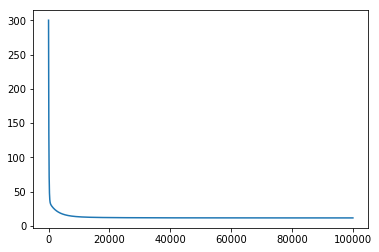

In [20]:
plt.plot(loss_history)
plt.show()